# 第1章 とにかくDeep Learningを体験！

## Google Colaboratory上で，TensorFlowによる文字認識（MNISTデータ）をやってみよう．

## MNISTデータセット

MNIST，手書き数字画像のデータセットである．  
米国商務省配下の研究所が構築したこのデータベースは，機械学習分野での学習や評価に広く用いられている．  
<img src="img/MnistExamples.png">
<div style="text-align: center;">
図1.  MNISTテストデータセットのサンプル
</div>

参考文献:
[MNISTデータベース](https://ja.wikipedia.org/wiki/MNIST%E3%83%87%E3%83%BC%E3%82%BF%E3%83%99%E3%83%BC%E3%82%B9)

## さっそく動かしてみよう！

In [1]:
# TensorFlow をセットアップする
import tensorflow as tf

# MNIST（0から9の数字画像）セットを読み込む
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 機械学習モデルを構築する
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# モデルの構成
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# 学習
model.fit(x_train, y_train, epochs=5)

# モデルの評価を行う
model.evaluate(x_test,  y_test, verbose=2)

# テストデータに対する予測を行う
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

Metal device set to: Apple M1 Max
Epoch 1/5


2023-02-26 14:52:26.077391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-26 14:52:26.077518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-26 14:52:26.273543: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  11/1875 [..............................] - ETA: 10s - loss: 2.0235 - accuracy: 0.3125 

2023-02-26 14:52:26.433183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2801 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1338 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1010 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0791 - accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0678 - accuracy: 0.9789


2023-02-26 14:53:11.938933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0777 - accuracy: 0.9759 - 1s/epoch - 4ms/step


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.5715678e-07, 2.4427879e-07, 2.6945215e-06, 1.4159628e-04,
        1.4851774e-11, 2.6433872e-07, 1.4538626e-12, 9.9982542e-01,
        6.5637130e-07, 2.8876691e-05],
       [7.4538825e-08, 1.1367847e-04, 9.9987864e-01, 6.3394045e-06,
        1.0769135e-13, 7.2141191e-08, 3.4900930e-07, 2.4410721e-12,
        7.0170108e-07, 1.8720962e-11],
       [1.1300269e-06, 9.9879211e-01, 8.4656116e-05, 2.7939172e-05,
        1.9724476e-04, 7.3105533e-05, 7.4072093e-05, 1.9926150e-04,
        5.3287362e-04, 1.7672048e-05],
       [9.9990284e-01, 1.2754000e-08, 2.9958754e-05, 9.9120314e-08,
        8.4993594e-09, 2.9877017e-07, 2.5316362e-05, 3.8169168e-05,
        4.2672736e-09, 3.3114434e-06],
       [7.5803841e-06, 2.1661896e-10, 1.3619557e-05, 4.5941624e-09,
        9.9919444e-01, 2.5945627e-07, 1.4803302e-05, 1.0909339e-04,
        4.9518758e-07, 6.5959676e-04]], dtype=float32)>

## 文字認識の結果を確認してみよう

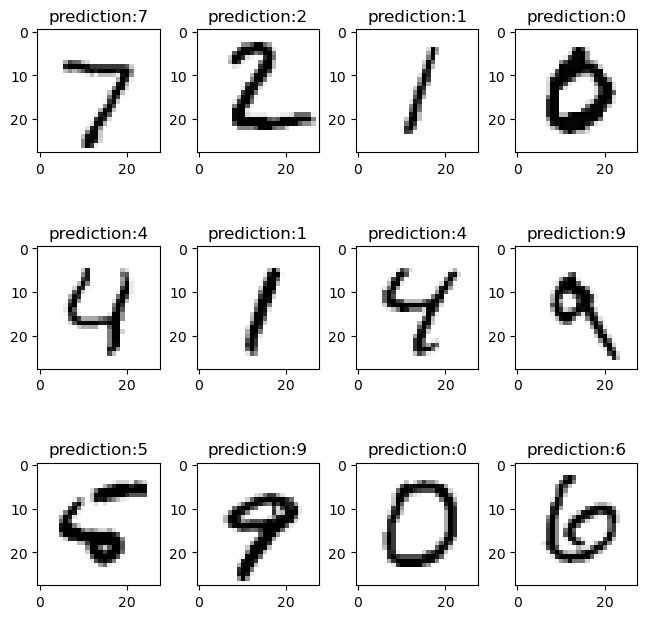

In [59]:
import numpy as np
import matplotlib.pyplot as plt

row = 3
col = 4
predictions = probability_model(x_test[:row*col])

fig = plt.figure(figsize=(row, col))

# 予測と正解を可視化して比べてみる
fig.subplots_adjust(left=0, right=2, bottom=0.5, top=2, hspace=0.3, wspace=0.3)
for index, prediction in enumerate(predictions):
    ax = fig.add_subplot(row, col, index + 1)
    ax.set_title("prediction:"+str(np.argmax(prediction)))
    plt.imshow(x_test[index] * 255, cmap="gray_r")
plt.show()

### 参考文献
- [初心者のための TensorFlow 2.0 入門](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja)
- [TensorFlowのチュートリアルをコメント付けながら実行してみた（初心者のための_TensorFlow_2_0_入門）](https://qiita.com/penpenta/items/ee45f58d416c656639aa)

[講義資料に戻る](https://github.com/crotsu/Deep_Learning_Starting_with_Examples)

このページは[このリンク](https://colab.research.google.com/github/crotsu/Deep_Learning_Starting_with_Examples/blob/main/chap1_deeplearning/chap1_deeplearning.ipynb)よりgoogle colaboratoryで動作させることができる．  